In [26]:
import pandas as pd 
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb 
import numpy as np 
import datetime 
%matplotlib inline 


In [27]:
import warnings 
warnings.filterwarnings('ignore')

In [28]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [29]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [30]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [31]:
banks_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)

In [32]:
banks_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [44]:
banks_stocks.tail()

Bank Ticker   BAC                                               C              \
Stock Info   High   Low  Open Close        Volume Adj Close  High   Low  Open   
Date                                                                            
2021-12-27  44.82 44.31 44.55 44.64 33,879,200.00     44.64 60.94 60.00 60.40   
2021-12-28  45.08 44.42 44.47 44.70 32,492,400.00     44.70 61.33 60.31 60.44   
2021-12-29  45.12 44.60 44.85 44.63 25,294,900.00     44.63 60.98 60.27 60.81   
2021-12-30  45.10 44.48 44.75 44.53 23,852,200.00     44.53 61.07 60.39 60.62   
2021-12-31  44.72 44.28 44.52 44.49 24,253,900.00     44.49 60.76 60.12 60.43   

Bank Ticker        ...     MS                                 WFC              \
Stock Info  Close  ...   Open  Close       Volume Adj Close  High   Low  Open   
Date               ...                                                          
2021-12-27  60.65  ...  99.72 100.40 4,196,000.00    100.40 48.82 48.08 48.55   
2021-12-28  60.62  ... 100.60  99.97 4,269,700.00     99.97 49.19 48.36 48.56   
2021-12-29  60.54  ... 100.05  98.73 6,923,100.00     98.73 48.86 48.37 48.60   
2021-12-30  60.43  ...  98.86  98.80 3,564,900.00     98.80 48.91 48.04 48.49   
2021-12-31  60.39  ...  98.73  98.16 5,124,800.00     98.16 48.36 47.84 48.03   

Bank Ticker                                
Stock Info  Close        Volume Adj Close  
Date                                       
2021-12-27  48.77 11,900,400.00     48.77  
2021-12-28  48.42 14,320,500.00     48.42  
2021-12-29  48.45 14,390,700.00     48.45  
2021-12-30  48.10 13,701,300.00     48.10  
2021-12-31  47.98 12,649,300.00     47.98  

[5 rows x 36 columns]

In [34]:
banks_stocks.xs('Close', level = 'Stock Info', axis = 1).max()

Bank Ticker
BAC    54.90
C     564.10
GS    423.85
JPM   171.78
MS    105.45
WFC    65.93
dtype: float64

In [35]:
returns = pd.DataFrame()

In [36]:
for tick in tickers:
    returns[tick+ 'Return'] = banks_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.01,-0.02,-0.01,-0.01,0.00,-0.01
2006-01-05,0.00,0.00,-0.00,0.00,0.00,-0.00
2006-01-06,-0.00,0.00,0.01,0.01,0.00,0.01
2006-01-09,0.00,-0.00,0.01,0.02,0.01,-0.00


In [37]:
import seaborn as sns

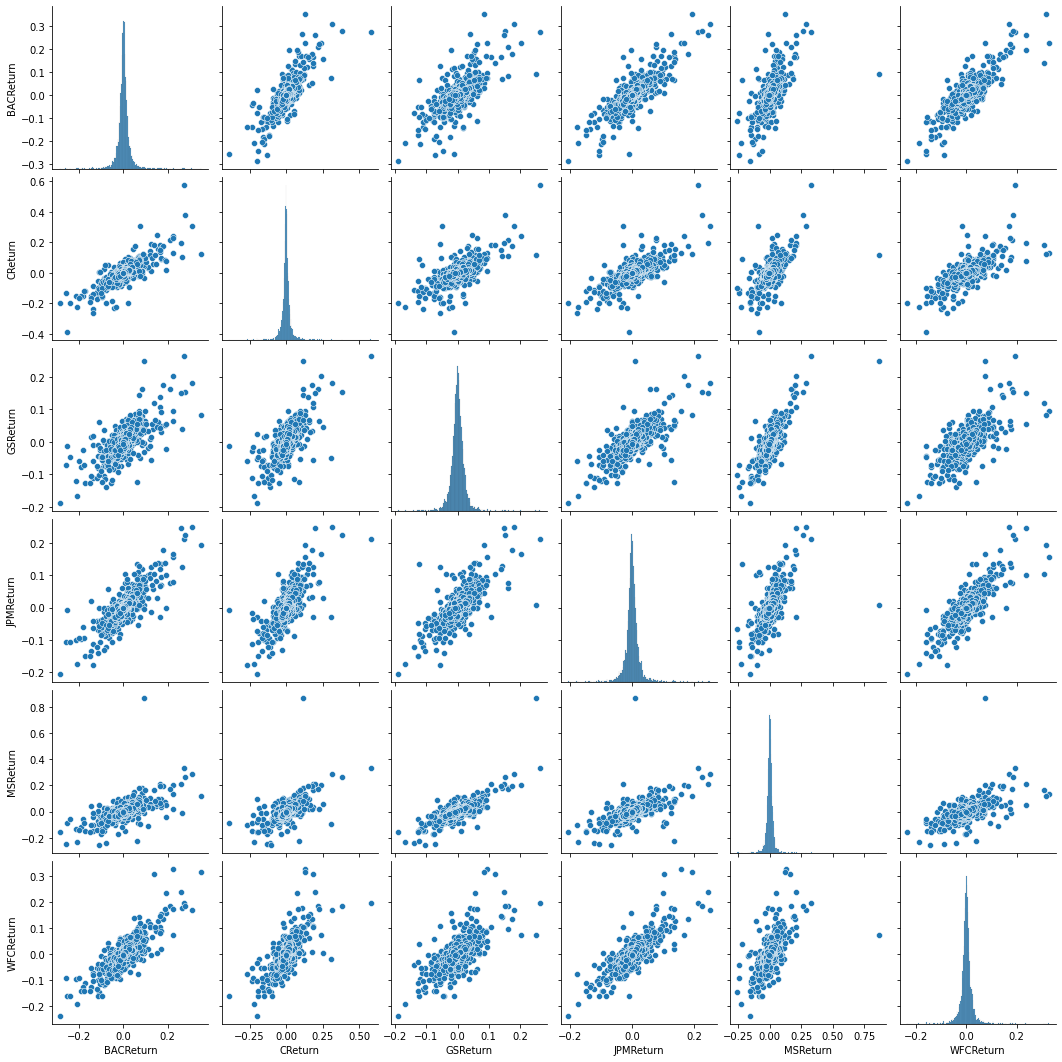

In [38]:
sns.pairplot(data = returns[1:])

In [40]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [42]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [43]:
returns.std()

BACReturn   0.03
CReturn     0.03
GSReturn    0.02
JPMReturn   0.02
MSReturn    0.03
WFCReturn   0.03
dtype: float64

<AxesSubplot:xlabel='MSReturn', ylabel='Density'>

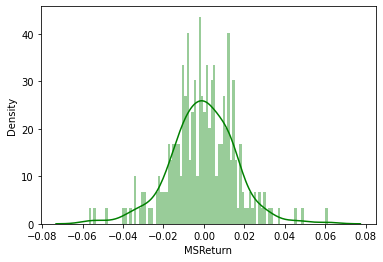

In [48]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MSReturn'], color = 'green', bins = 100)

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

<AxesSubplot:xlabel='Date'>

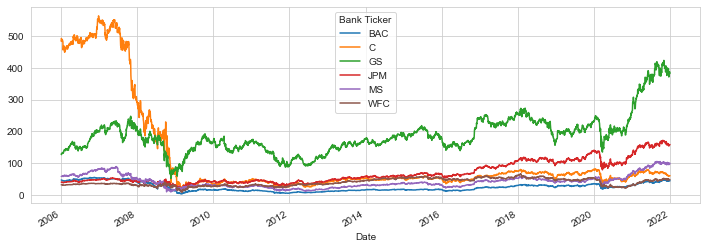

In [50]:
banks_stocks.xs('Close', level = 'Stock Info', axis = 1).plot(figsize=(12,4), label = tick)

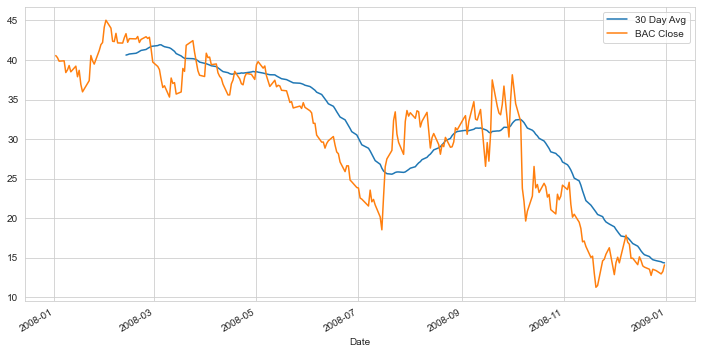

In [51]:
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

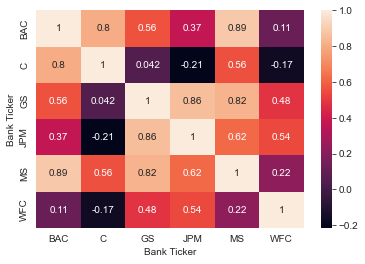

In [54]:
sns.heatmap(banks_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

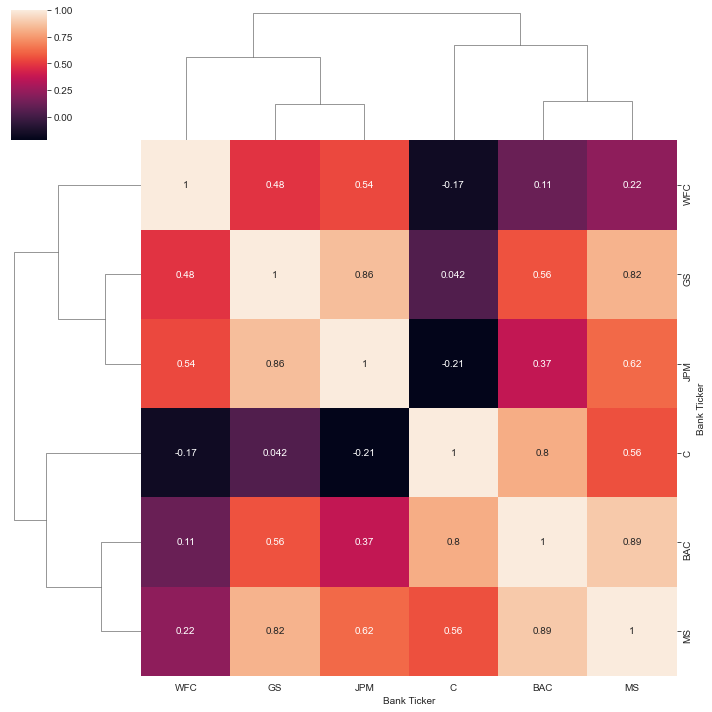

In [55]:
sns.clustermap(banks_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)